In [78]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import seaborn as sns
from scipy.special import comb
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import LogNorm
import pandas as pd
import scipy.stats as st
from matplotlib.patches import Patch

plt.rcParams.update({'font.size': 7,'axes.linewidth':0.5,
                     'xtick.major.size':2,'xtick.major.width':0.5,
                    'ytick.major.size':2,'ytick.major.width':0.5})
plt.rcParams.update({'mathtext.default':  'regular' })


colorH1, colorH3, colorFluB, colorH9 = "#E8735C", "#72C2A6", "#5482A7", "#663399"


In [79]:
# set some things
num_mutations_H1 = 16
order_H1 = 4
total_params_H1 = np.sum(np.array([int(comb(num_mutations_H1,i)) for i in range(1,order_H1+1)]))


num_mutations_H3 = 13
order_H3 = 4
total_params_H3 = np.sum(np.array([int(comb(num_mutations_H3,i)) for i in range(1,order_H3+1)]))


num_mutations_6261_H1 = 11
order_6261_H1 = 3
total_params_6261_H1 = np.sum(np.array([int(comb(num_mutations_6261_H1,i)) for i in range(1,order_6261_H1+1)]))

num_mutations_6261_H9 = 11
order_6261_H9_biochem = 4
total_params_6261_H9_biochem = np.sum(np.array([int(comb(num_mutations_6261_H9,i)) for i in range(1,order_6261_H9_biochem+1)]))
order_6261_H9_stat = 3
total_params_6261_H9_stat = np.sum(np.array([int(comb(num_mutations_6261_H9,i)) for i in range(1,order_6261_H9_stat+1)]))


# 9114

In [80]:
# read model coefficients

coefs_H1_biochem = np.zeros(total_params_H1+1)
sig_H1_biochem = np.full((total_params_H1+1),0)
with open('../../../CR9114/Epistasis_linear_models/model_coefs/H1_'+str(order_H1)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H1+1):
        row = next(coef_reader)
        coefs_H1_biochem[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H1_biochem[i] = 1
    readfile.close()           
num_sig_H1_biochem = len(np.nonzero(sig_H1_biochem == 1)[0])

coefs_H1_stat = np.zeros(total_params_H1+1)
sig_H1_stat = np.full((total_params_H1+1),0)
with open('../../../CR9114/Epistasis_linear_models/model_coefs/H1_'+str(order_H1)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H1+1):
        row = next(coef_reader)
        coefs_H1_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H1_stat[i] = 1
    readfile.close()           
num_sig_H1_stat = len(np.nonzero(sig_H1_stat == 1)[0])

coefs_H1_biochem_xform = np.zeros(total_params_H1+1)
sig_H1_biochem_xform = np.full((total_params_H1+1),0)
with open('model_coefs/globalep_9114_H1_logistic4_'+str(order_H1)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H1+1):
        row = next(coef_reader)
        coefs_H1_biochem_xform[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H1_biochem_xform[i] = 1
    readfile.close()           
num_sig_H1_biochem_xform = len(np.nonzero(sig_H1_biochem_xform == 1)[0])

coefs_H1_stat_xform = np.zeros(total_params_H1+1)
sig_H1_stat_xform = np.full((total_params_H1+1),0)
with open('model_coefs/globalep_9114_H1_logistic4_'+str(order_H1)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H1+1):
        row = next(coef_reader)
        coefs_H1_stat_xform[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H1_stat_xform[i] = 1
    readfile.close()           
num_sig_H1_stat_xform = len(np.nonzero(sig_H1_stat_xform == 1)[0])

print(num_sig_H1_biochem,num_sig_H1_stat,num_sig_H1_biochem_xform,num_sig_H1_stat_xform)


coefs_H3_biochem = np.zeros(total_params_H3+1)
sig_H3_biochem = np.full((total_params_H3+1),0)
with open('../../../CR9114/Epistasis_linear_models/model_coefs/H3_'+str(order_H3)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H3+1):
        row = next(coef_reader)
        coefs_H3_biochem[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H3_biochem[i] = 1
    readfile.close()           
num_sig_H3_biochem = len(np.nonzero(sig_H3_biochem == 1)[0])

coefs_H3_stat = np.zeros(total_params_H3+1)
sig_H3_stat = np.full((total_params_H3+1),0)
with open('../../../CR9114/Epistasis_linear_models/model_coefs/H3_'+str(order_H3)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H3+1):
        row = next(coef_reader)
        coefs_H3_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H3_stat[i] = 1
    readfile.close()           
num_sig_H3_stat = len(np.nonzero(sig_H3_stat == 1)[0])

coefs_H3_biochem_xform = np.zeros(total_params_H3+1)
sig_H3_biochem_xform = np.full((total_params_H3+1),0)
with open('model_coefs/globalep_9114_H3_logistic4_'+str(order_H3)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    for i in range(4+2):
        next(coef_reader)
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H3+1):
        row = next(coef_reader)
        coefs_H3_biochem_xform[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H3_biochem_xform[i] = 1
    readfile.close()           
num_sig_H3_biochem_xform = len(np.nonzero(sig_H3_biochem_xform == 1)[0])

coefs_H3_stat_xform = np.zeros(total_params_H3+1)
sig_H3_stat_xform = np.full((total_params_H3+1),0)
with open('model_coefs/globalep_9114_H3_logistic4_'+str(order_H3)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    for i in range(4+2):
        next(coef_reader)
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H3+1):
        row = next(coef_reader)
        coefs_H3_stat_xform[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H3_stat_xform[i] = 1
    readfile.close()           
num_sig_H3_stat_xform = len(np.nonzero(sig_H3_stat_xform == 1)[0])

print(num_sig_H3_biochem,num_sig_H3_stat,num_sig_H3_biochem_xform,num_sig_H3_stat_xform)


210 277 127 233
73 128 97 126


# 6261

In [81]:
# read model coefficients

coefs_6261_H1_biochem = np.zeros(total_params_6261_H1+1)
sig_6261_H1_biochem = np.full((total_params_6261_H1+1),0)
with open('../../../CR6261/Epistasis_linear_models/model_coefs/H1_'+str(order_6261_H1)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H1+1):
        row = next(coef_reader)
        coefs_6261_H1_biochem[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H1_biochem[i] = 1
    readfile.close()           
num_sig_6261_H1_biochem = len(np.nonzero(sig_6261_H1_biochem == 1)[0])

coefs_6261_H1_stat = np.zeros(total_params_6261_H1+1)
sig_6261_H1_stat = np.full((total_params_6261_H1+1),0)
with open('../../../CR6261/Epistasis_linear_models/model_coefs/H1_'+str(order_6261_H1)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H1+1):
        row = next(coef_reader)
        coefs_6261_H1_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H1_stat[i] = 1
    readfile.close()           
num_sig_6261_H1_stat = len(np.nonzero(sig_6261_H1_stat == 1)[0])

coefs_6261_H1_biochem_xform = np.zeros(total_params_6261_H1+1)
sig_6261_H1_biochem_xform = np.full((total_params_6261_H1+1),0)
with open('model_coefs/globalep_6261_H1_logistic4_'+str(order_6261_H1)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    for i in range(4+2):
        next(coef_reader)
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H1+1):
        row = next(coef_reader)
        coefs_6261_H1_biochem_xform[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H1_biochem_xform[i] = 1
    readfile.close()           
num_sig_6261_H1_biochem_xform = len(np.nonzero(sig_6261_H1_biochem_xform == 1)[0])

coefs_6261_H1_stat_xform = np.zeros(total_params_6261_H1+1)
sig_6261_H1_stat_xform = np.full((total_params_6261_H1+1),0)
with open('model_coefs/globalep_6261_H1_logistic4_'+str(order_6261_H1)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    for i in range(4+2):
        next(coef_reader)
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H1+1):
        row = next(coef_reader)
        coefs_6261_H1_stat_xform[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H1_stat_xform[i] = 1
    readfile.close()           
num_sig_6261_H1_stat_xform = len(np.nonzero(sig_6261_H1_stat_xform == 1)[0])

print(num_sig_6261_H1_biochem,num_sig_6261_H1_stat,num_sig_6261_H1_biochem_xform,num_sig_6261_H1_stat_xform)


coefs_6261_H9_biochem = np.zeros(total_params_6261_H9_biochem+1)
sig_6261_H9_biochem = np.full((total_params_6261_H9_biochem+1),0)
with open('../../../CR6261/Epistasis_linear_models/model_coefs/H9_'+str(order_6261_H9_biochem)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H9_biochem+1):
        row = next(coef_reader)
        coefs_6261_H9_biochem[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H9_biochem[i] = 1
    readfile.close()           
num_sig_6261_H9_biochem = len(np.nonzero(sig_6261_H9_biochem == 1)[0])

coefs_6261_H9_stat = np.zeros(total_params_6261_H9_stat+1)
sig_6261_H9_stat = np.full((total_params_6261_H9_stat+1),0)
with open('../../../CR6261/Epistasis_linear_models/model_coefs/H9_'+str(order_6261_H9_stat)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H9_stat+1):
        row = next(coef_reader)
        coefs_6261_H9_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H9_stat[i] = 1
    readfile.close()           
num_sig_6261_H9_stat = len(np.nonzero(sig_6261_H9_stat == 1)[0])

coefs_6261_H9_biochem_xform = np.zeros(total_params_6261_H9_biochem+1)
sig_6261_H9_biochem_xform = np.full((total_params_6261_H9_biochem+1),0)
with open('model_coefs/globalep_6261_H9_logistic4_'+str(order_6261_H9_biochem)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    for i in range(4+2):
        next(coef_reader)
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H9_biochem+1):
        row = next(coef_reader)
        coefs_6261_H9_biochem_xform[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H9_biochem_xform[i] = 1
    readfile.close()           
num_sig_6261_H9_biochem_xform = len(np.nonzero(sig_6261_H9_biochem_xform == 1)[0])

coefs_6261_H9_stat_xform = np.zeros(total_params_6261_H9_stat+1)
sig_6261_H9_stat_xform = np.full((total_params_6261_H9_stat+1),0)
with open('model_coefs/globalep_6261_H9_logistic4_'+str(order_6261_H9_stat)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    for i in range(4+2):
        next(coef_reader)
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H9_stat+1):
        row = next(coef_reader)
        coefs_6261_H9_stat_xform[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H9_stat_xform[i] = 1
    readfile.close()           
num_sig_6261_H9_stat_xform = len(np.nonzero(sig_6261_H9_stat_xform == 1)[0])

print(num_sig_6261_H9_biochem,num_sig_6261_H9_stat,num_sig_6261_H9_biochem_xform,num_sig_6261_H9_stat_xform)


40 52 25 41
40 43 29 42


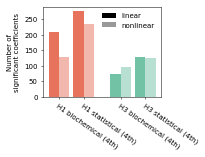

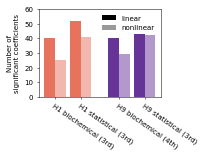

In [84]:
fig,ax = plt.subplots(figsize=(2.8,2.2))

width = 0.1
adj = 0.02

plt.bar(1-3*width/2-adj,num_sig_H1_biochem,width=width,color=colorH1)
plt.bar(1-width/2-adj,num_sig_H1_biochem_xform,width=width,color=colorH1,alpha=0.5)
plt.bar(1+width/2+adj,num_sig_H1_stat,width=width,color=colorH1)
plt.bar(1+3*width/2+adj,num_sig_H1_stat_xform,width=width,color=colorH1,alpha=0.5)

plt.bar(1.6-3*width/2-adj,num_sig_H3_biochem,width=width,color=colorH3)
plt.bar(1.6-width/2-adj,num_sig_H3_biochem_xform,width=width,color=colorH3,alpha=0.5)
plt.bar(1.6+width/2+adj,num_sig_H3_stat,width=width,color=colorH3)
plt.bar(1.6+3*width/2+adj,num_sig_H3_stat_xform,width=width,color=colorH3,alpha=0.5)

plt.xticks([1-width-adj,1+width+adj,1.6-width-adj,1.6+width+adj],
           ['H1 biochemical (4th)','H1 statistical (4th)','H3 biochemical (4th)','H3 statistical (4th)']
           ,rotation=-35,ha='left',rotation_mode="anchor")
plt.ylabel('Number of\nsignificant coefficients')
legend_elements = [Patch(facecolor='black',label='linear'),
                  Patch(facecolor='black',alpha=0.4,label='nonlinear')]
plt.legend(handles=legend_elements,frameon=False)
plt.tight_layout()
plt.savefig('images/sig_coef_comparison_9114.pdf')
plt.show()



fig,ax = plt.subplots(figsize=(2.8,2.2))

plt.bar(1-3*width/2-adj,num_sig_6261_H1_biochem,width=width,color=colorH1)
plt.bar(1-width/2-adj,num_sig_6261_H1_biochem_xform,width=width,color=colorH1,alpha=0.5)
plt.bar(1+width/2+adj,num_sig_6261_H1_stat,width=width,color=colorH1)
plt.bar(1+3*width/2+adj,num_sig_6261_H1_stat_xform,width=width,color=colorH1,alpha=0.5)

plt.bar(1.6-3*width/2-adj,num_sig_6261_H9_biochem,width=width,color=colorH9)
plt.bar(1.6-width/2-adj,num_sig_6261_H9_biochem_xform,width=width,color=colorH9,alpha=0.5)
plt.bar(1.6+width/2+adj,num_sig_6261_H9_stat,width=width,color=colorH9)
plt.bar(1.6+3*width/2+adj,num_sig_6261_H9_stat_xform,width=width,color=colorH9,alpha=0.5)

plt.xticks([1-width-adj,1+width+adj,1.6-width-adj,1.6+width+adj],
           ['H1 biochemical (3rd)','H1 statistical (3rd)','H9 biochemical (4th)','H9 statistical (3rd)']
           ,rotation=-35,ha='left',rotation_mode="anchor")
plt.ylabel('Number of\nsignificant coefficients')
legend_elements = [Patch(facecolor='black',label='linear'),
                  Patch(facecolor='black',alpha=0.4,label='nonlinear')]
plt.legend(handles=legend_elements,frameon=False,loc='upper right')
plt.ylim([0,60])

plt.tight_layout()
plt.savefig('images/sig_coef_comparison_6261.pdf')

plt.show()

